# Testing the ALeRCE forecasting tool (under construction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Load the ALeRCE client 
https://alerce.readthedocs.io/en/latest/ 
(API http://api.alerce.online/ztf/v1)

In [2]:
#!pip install alerce

In [3]:
from alerce.core import Alerce
alerce = Alerce()

# Select a SN

In [4]:
oid = "ZTF19abahvdh" #"ZTF21aaqftuq"

In [5]:
alerce.query_objects(oid=oid, format='pandas')

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF19abahvdh,27,135,58652.172269,58705.165648,False,False,25,-0.205154,None,...,58705.165648,52.99338,232.864384,7.095238,0.000024,0.00003,None,None,None,corr_bulk_0.0.1


# Check in ALeRCE explorer

In [6]:
from IPython.core.display import display, HTML
display(HTML("<a href=\"https://dev.alerce.online/object/%s\">%s</a>" % (oid, oid)))
# control-left click to open in new tab

# Query object statistics

Let's look at the `object` table using the `query_objects` function. Note that `oid` is a unique identifier per object, as reported by ZTF. Also, note that the `meanra` and `meandec` fields show the mean of the right ascension and declination.

In [7]:
alerce.query_objects(oid=oid, format='pandas')

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF19abahvdh,27,135,58652.172269,58705.165648,False,False,25,-0.205154,None,...,58705.165648,52.99338,232.864384,7.095238,0.000024,0.00003,None,None,None,corr_bulk_0.0.1


# Query object band dependent statistics

Let's query some filter dependent statistics from the `magstats` table using the `query_magstats` function. Note that `fid` is a unique identifier per filter (`fid=1` for g band and `fid=2` for r band).

In [8]:
alerce.query_magstats(oid=oid, format='pandas')

,fid,stellar,corrected,ndet,ndubious,magmean,magmedian,magmax,magmin,magsigma,maglast,magfirst,firstmjd,lastmjd,step_id_corr
0,1,False,False,11,0,18.913940,18.838703,19.8553,18.138979,None,19.845331,19.8553,58652.170,58692.190,bulk_version_0.0.1
1,2,False,False,14,0,19.044666,19.071957,20.1245,18.344133,None,19.691998,20.1245,58652.293,58705.164,bulk_version_0.0.1


# Get light curve

Now we will get the object's light curve of detections (from the `detection` table) and non-detections (from the `non-detection` table) using the `query_detections` and `query_non_detections` functions, respectively. Note that `candid` is a unique identifier per detection.

In [9]:
# Getting detections for an object
det = alerce.query_detections(oid, format="pandas")
det.head()

,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,magpsf_corr,...,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,candid_alert,step_id_corr,phase,parent_candid
0,58652.172269,898172265915015003,1,898172265915,19.591700,1,898,3.101610,19.855300,None,...,19.7412,0.6077,NaN,False,False,False,None,bulk_1.0.0,None,920204945915015004
1,58652.292697,898292695915015003,2,898292695915,19.592000,1,898,2.392100,20.124500,None,...,19.0745,0.3604,NaN,False,False,False,None,bulk_1.0.0,None,920204945915015004
2,58655.192130,901192125915015004,2,901192125915,20.360611,1,901,2.802778,19.360770,None,...,19.1880,0.1500,480120259.0,False,False,False,None,bulk_1.0.0,None,920204945915015004
3,58655.231933,901231935915015006,1,901231935915,20.553211,1,901,2.999988,19.257492,None,...,19.2263,0.1062,480120159.0,False,False,False,None,bulk_1.0.0,None,920204945915015004
4,58658.211331,904211335915015003,1,904211335915,20.703148,1,904,2.865873,18.606083,None,...,18.6431,0.0760,480120159.0,False,False,False,None,bulk_1.0.0,None,920204945915015004


In [10]:
# Getting non detections for an object
non_det = alerce.query_non_detections(oid, format="pandas")
non_det.head()

,mjd,fid,diffmaglim
0,58633.297870,2,20.5317
1,58636.211343,2,20.5167
2,58636.273090,1,20.9806
3,58639.252338,1,20.7302
4,58639.273032,2,20.5695


# Plot stamps

Let's look at the image stamps using the `plot_stamps` function. By default it uses the first available stamp.

In [11]:
alerce.plot_stamps(oid)

You can also select an arbitrary detection. Let's look at the peak magnitude stamp giving the `candid` associated to the minimum magnitude.

In [12]:
alerce.plot_stamps(oid=oid, candid=det.candid.loc[det.magpsf.idxmin()])

# Plot light curve

Let's plot the light curve

Text(0, 0.5, 'mag')

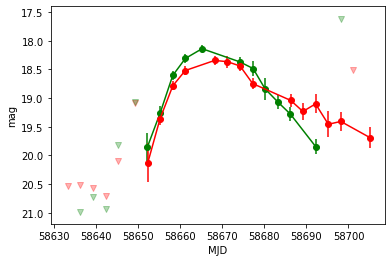

In [13]:
fig, ax = plt.subplots()
colors = {1: 'g', 2: 'r'}
for fid in det.fid.unique():
    mask = det.fid == fid
    ax.errorbar(det.loc[mask].mjd, det.loc[mask].magpsf, yerr=det.loc[mask].sigmapsf, c=colors[fid], marker='o')
for fid in non_det.fid.unique():
    mask = non_det.fid == fid
    ax.scatter(non_det.loc[mask].mjd, non_det.loc[mask].diffmaglim, c=colors[fid], marker='v', alpha=0.3)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel("MJD")
ax.set_ylabel("mag")

# Forecasting

All objects with at least six detections in ZTF are automatically fitted with a parametric model by the ALeRCE pipeline. The model is a modified version from Villar et al. 2019, relevant for supernova-like objects.

* Modified model from Villar et al. 2019

$$
\Large
F = \begin{cases}
        \cfrac{A \left(1 - \beta' \frac{t - t_0}{t_1 - t_0}\right)}{1 + \exp{\left(-\frac{t - t_0}{\tau_{\rm rise}}\right)}} & \mbox{if} \; t < t_1  \\ 
        \\
        \cfrac{A (1 - \beta') \exp{\left(-\frac{t - t_1}{\tau_{\rm fall}}\right)}}{1 + \exp{\left(-\frac{t - t_0}{\tau_{\rm rise}}\right)}} & \mbox{if} \; t \ge t_1,
  \end{cases}
$$

* Compare with Villar et al. 2019

![](figures/Villar+19.png)

The best fitting parameters can be accessed from `feature` table, using the `query_features` function.

In [14]:
features = alerce.query_features(oid, format="pandas")
features.head()

,name,value,fid,version
0,MaxSlope,0.218638,1,feature_0.0.1
1,MHPS_ratio,24.880235,2,feature_0.0.1
2,MHPS_ratio,8.301924,1,feature_0.0.1
3,MHPS_non_zero,12.000000,2,feature_0.0.1
4,MHPS_non_zero,10.000000,1,feature_0.0.1


Let's look at all the available features (we use unique as some features are given per filter).

In [15]:
", ".join(features.name.unique())

'MaxSlope, MHPS_ratio, MHPS_non_zero, MHPS_low, MHPS_high, MHPS_PN_flag, LinearTrend, IAR_phi, Harmonics_phase_7, Harmonics_phase_6, Harmonics_phase_5, Harmonics_phase_4, Harmonics_phase_3, Harmonics_phase_2, Harmonics_mse, Harmonics_mag_7, Harmonics_mag_6, Harmonics_mag_5, Harmonics_mag_4, Harmonics_mag_3, Harmonics_mag_2, Harmonics_mag_1, Gskew, GP_DRW_tau, GP_DRW_sigma, ExcessVar, Eta_e, Con, Beyond1Std, Autocor_length, AndersonDarling, Amplitude, sgscore1, rb, positive_fraction, n_pos, n_non_det_before_fid, n_non_det_after_fid, n_neg, n_det, min_mag, median_diffmaglim_before_fid, median_diffmaglim_after_fid, mean_mag, max_diffmaglim_before_fid, max_diffmaglim_after_fid, last_mjd_before_fid, last_diffmaglim_before_fid, iqr, gal_l, gal_b, g-r_mean_corr, g-r_mean, g-r_max_corr, g-r_max, first_mag, dmag_non_det_fid, dmag_first_det_fid, delta_period, delta_mjd_fid, delta_mag_fid, StetsonK, Std, SmallKurtosis, Skew, SPM_tau_rise, SPM_tau_fall, SPM_t0, SPM_gamma, SPM_chi, SPM_beta, SPM_A,

All the SPM_xx features are associated to the supernova parametric model shown above. Let's have a look at them:

In [16]:
features.loc[features.name.isin(["SPM_tau_rise", "SPM_tau_fall", "SPM_t0",
                                 "SPM_gamma", "SPM_chi", "SPM_beta", "SPM_A"])]

,name,value,fid,version
121,SPM_tau_rise,4.079213,2,feature_0.0.1
122,SPM_tau_rise,2.927588,1,feature_0.0.1
123,SPM_tau_fall,33.923837,2,feature_0.0.1
124,SPM_tau_fall,12.768132,1,feature_0.0.1
125,SPM_t0,4.838326,2,feature_0.0.1
126,SPM_t0,2.825052,1,feature_0.0.1
127,SPM_gamma,19.762662,2,feature_0.0.1
128,SPM_gamma,17.062095,1,feature_0.0.1
129,SPM_chi,0.125456,2,feature_0.0.1
130,SPM_chi,0.054586,1,feature_0.0.1


Note that these values are given per filter. Also, note that the `SPM_A` is a flux stored in numerically convenient units (see Sánchez-Sáez et al. 2021).

# Forecast API 

https://api.alerce.online/forecast/v1/parametric/sn

A beta forecasting tool API is available in the address shown above. This first version can do forecasting based on the parametric model shown before. The inputs parameters for the API are the unique object's ID, `oid`, and the time in modified Julian date `mjd`. Let's create a function to get forecasts for a list of `mjd` times.

In [17]:
def get_forecasts(oid, times):
    print("Getting forecasts for %s..." % oid)
    forecasts = []
    for mjd in times:
        url = "https://api.alerce.online/forecast/v1/parametric/sn?oid=%s&mjd=%s" % (oid, mjd)
        response = requests.get(url)
        forecasts.append(pd.DataFrame(response.json()["forecast"]))
    return pd.concat(forecasts)

And a function to plot the detections, non-detections, and forecasts together:

In [18]:
def plot_SN(oid, det, non_det, pred):
    fig, ax = plt.subplots()
    colors = {1: 'g', 2: 'r'}
    for fid in det.fid.unique():
        mask = det.fid == fid
        ax.errorbar(det.loc[mask].mjd, det.loc[mask].magpsf, yerr=det.loc[mask].sigmapsf, c=colors[fid], marker='o', lw=0, elinewidth=1)
        mask_f = pred.fid == fid
        ax.plot(pred.loc[mask_f].mjd.values, np.array(pred.loc[mask_f].magpsf.values), c=colors[fid], ls=":")
    if not non_det.empty:
        for fid in non_det.fid.unique():
            mask = non_det.fid == fid
            ax.scatter(non_det.loc[mask].mjd, non_det.loc[mask].diffmaglim, c=colors[fid], marker='v', alpha=0.3)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("MJD")
    ax.set_ylabel("mag")
    ax.set_title(oid)
    plt.show()
    plt.close()

Let's combine both functions

In [19]:
def show_forecast(oid):
    det = alerce.query_detections(oid, format="pandas")
    non_det = alerce.query_non_detections(oid, format="pandas")
    times = np.linspace(det.mjd.min() - 10, det.mjd.max() + 30, 10)
    pred = get_forecasts(oid, times)
    plot_SN(oid, det, non_det, pred)

And let's test it

Getting forecasts for ZTF19abahvdh...


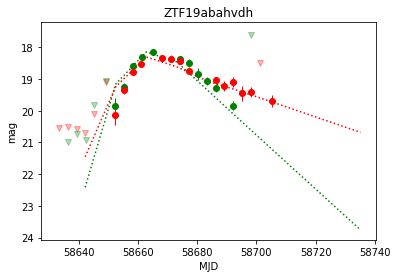

In [20]:
show_forecast(oid)

# Do it for many SNe

We have selected SNe reported to TNS by ALeRCE and used the forecasting tools from before. No particular selection was done other than being selected by the SN Hunter tool (https://snhunter.alerce.online/) to report to TNS at different times (a month, a few weeks, or one week before writing this notebook).

In [21]:
oids = [
    "ZTF21aapnijv", "ZTF21aapnihy", "ZTF21aapnikc", "ZTF21aapnikl", "ZTF21aapnhvr", "ZTF21aapnirw", "ZTF21aapngfw",
"ZTF21aapngms", "ZTF21aapnfsm", "ZTF21aapngmh", "ZTF21aapngep", "ZTF21aapnfnf", "ZTF21aaplasc", "ZTF21aaplbom", "ZTF18aaizgoq",
"ZTF21aapkysb", "ZTF21aapkykp", "ZTF21aapktmv", "ZTF21aapkkgx", "ZTF21aapkhzu", "ZTF21aapkisz", "ZTF21aapkfjx", "ZTF21aapkxyv",
"ZTF21aapkdba", "ZTF21aapkdma", "ZTF21aapkcwh", "ZTF21aapkbeu", "ZTF21aapkbzd", "ZTF21aapjyuo", "ZTF21aaoghxv", "ZTF21aapjxux",
"ZTF21aapjxey", "ZTF21aapkpgc", "ZTF21aapjphz", "ZTF21aaphjsu", "ZTF21aapjmda", "ZTF21aapjmpq", "ZTF21aapjmgf", "ZTF21aaplbkj",
"ZTF21aapipxi", "ZTF21aapizqg", "ZTF21aaphzlq", "ZTF21aaphzlo", "ZTF21aapfmek", "ZTF21aapfnlj", "ZTF21aapfohd", "ZTF21aapforn",
"ZTF21aaphvoy", "ZTF21aaphvdt", "ZTF21aaphlle", "ZTF21aaphuqm", "ZTF21aapfpod", "ZTF21aaphnax", "ZTF21aapfqdo", "ZTF21aaphskp",
"ZTF21aaphslt", "ZTF21aaphski", "ZTF21aaphqps", "ZTF21aaphonf", "ZTF21aaphpor", "ZTF21aaphokl", "ZTF21aaphnga", "ZTF20aadayjw",
"ZTF21aapfowm", "ZTF21aapfoxj", "ZTF18aawpqgd", "ZTF21aaphgph", "ZTF21aaphgrq", "ZTF21aapfrif", "ZTF21aapfpgk", "ZTF21aapejbx",
"ZTF21aapfmuk", "ZTF21aapfmut", "ZTF21aapfnoc", "ZTF21aapffqd", "ZTF21aapfhzr", "ZTF21aapfdzk", "ZTF21aapevpj", "ZTF21aapehpx", 
"ZTF21aapeyee", "ZTF21aapecxb", "ZTF21aapebpg", "ZTF21aapdxkd", "ZTF21aapdvqa", "ZTF21aapdxxs", "ZTF21aapduio", "ZTF21aapdumx",
"ZTF21aapdulz", "ZTF21aapduck", "ZTF21aapduba", "ZTF21aapdtyy", "ZTF21aapdqbe", "ZTF21aapdpup", "ZTF21aapdmnr", "ZTF21aapdlpp",
"ZTF21aapdlnd"]

Getting forecasts for ZTF21aapnihy...


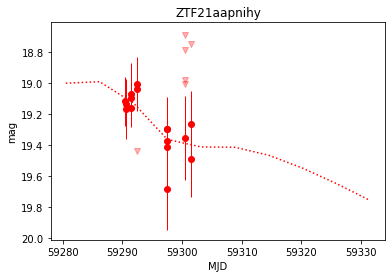

Getting forecasts for ZTF21aapnikc...


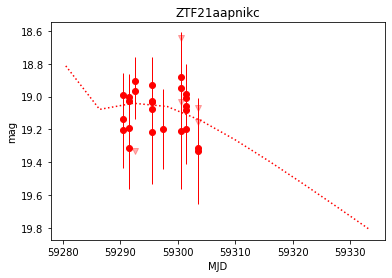

Getting forecasts for ZTF21aapngfw...


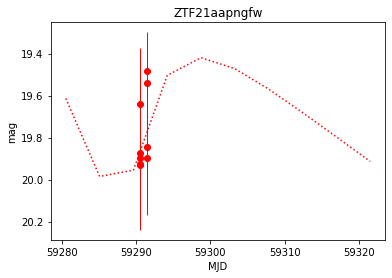

Getting forecasts for ZTF21aapngms...


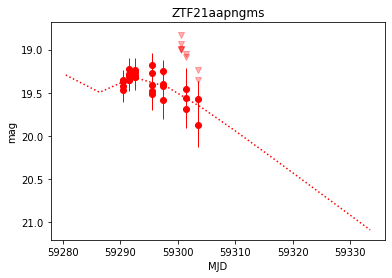

Getting forecasts for ZTF21aapnfsm...


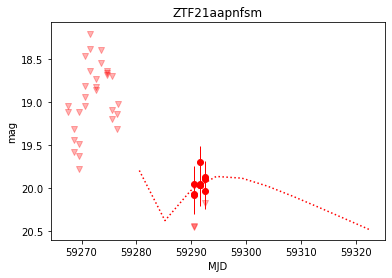

Getting forecasts for ZTF21aapngmh...


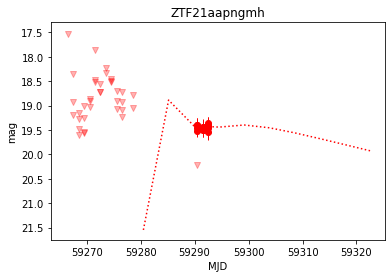

Getting forecasts for ZTF21aapngep...


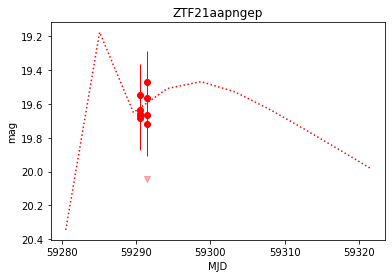

Getting forecasts for ZTF21aapnfnf...


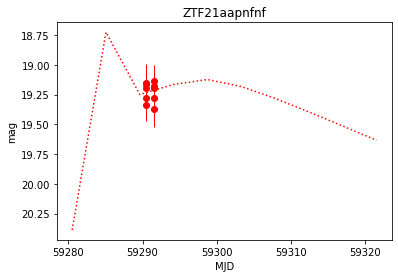

Getting forecasts for ZTF18aaizgoq...


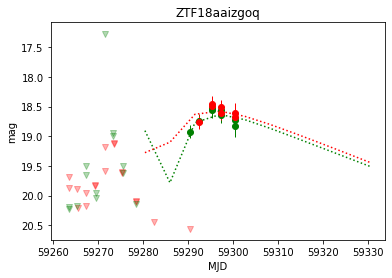

Getting forecasts for ZTF21aapkysb...


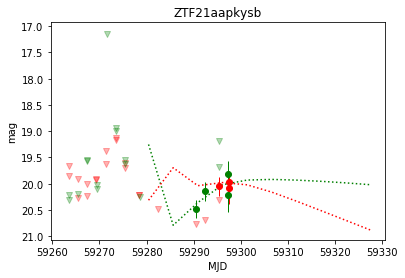

Getting forecasts for ZTF21aapktmv...


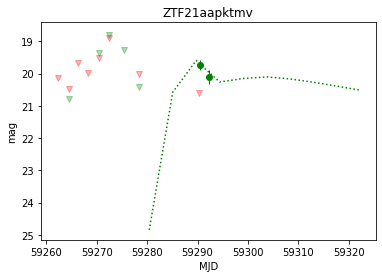

Getting forecasts for ZTF21aapkkgx...


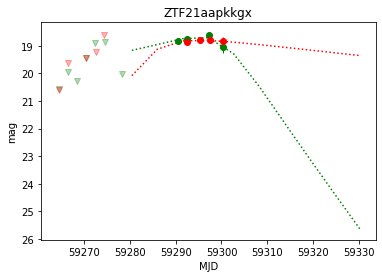

Getting forecasts for ZTF21aapkisz...


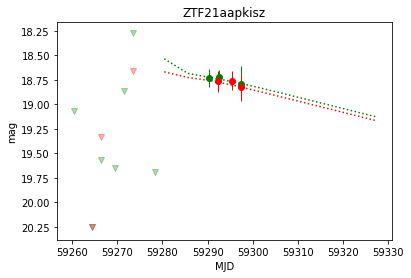

Getting forecasts for ZTF21aapkfjx...


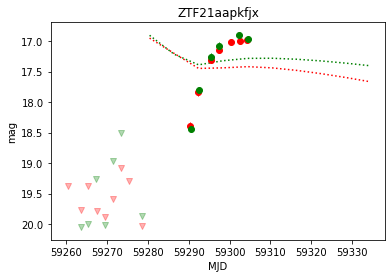

Getting forecasts for ZTF21aapkxyv...


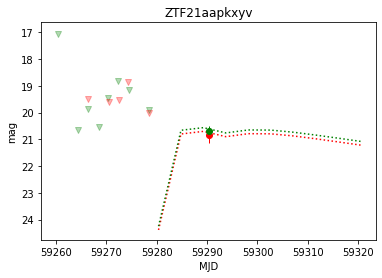

Getting forecasts for ZTF21aapkdma...


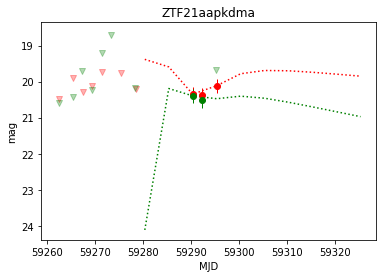

Getting forecasts for ZTF21aapkcwh...


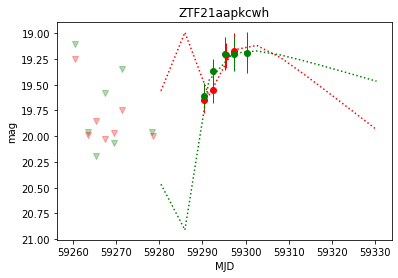

Getting forecasts for ZTF21aapkbeu...


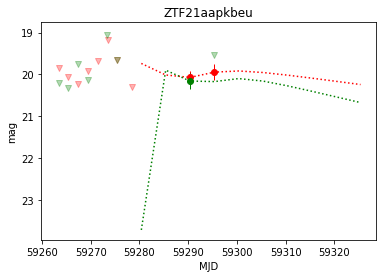

Getting forecasts for ZTF21aapkbzd...


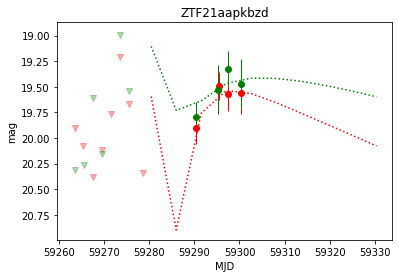

Getting forecasts for ZTF21aapjyuo...


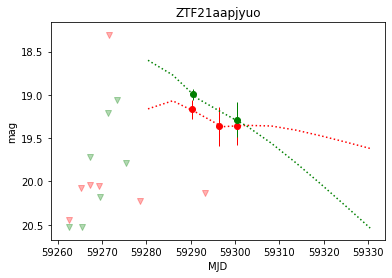

Getting forecasts for ZTF21aaoghxv...


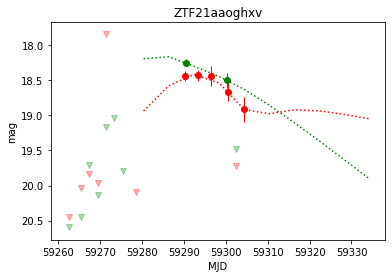

Getting forecasts for ZTF21aapjxey...


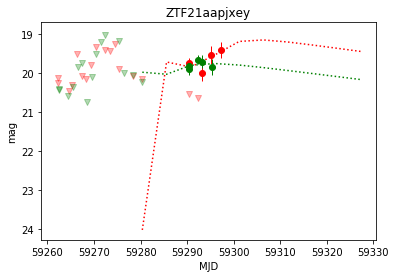

Getting forecasts for ZTF21aapjphz...


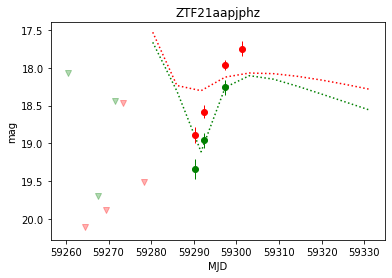

Getting forecasts for ZTF21aapjmda...


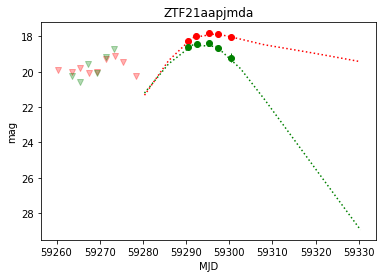

Getting forecasts for ZTF21aapjmpq...


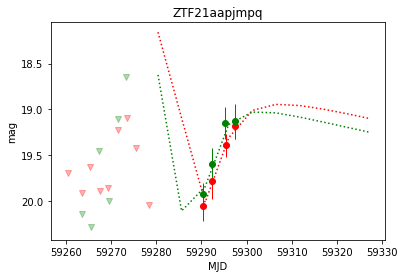

Getting forecasts for ZTF21aapjmgf...


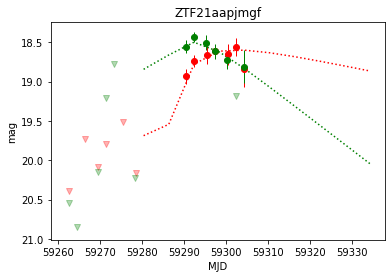

Getting forecasts for ZTF21aapfmek...


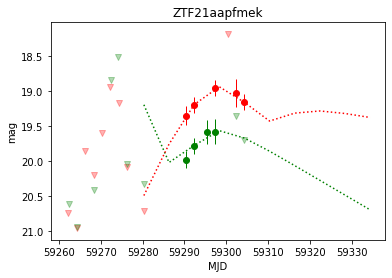

Getting forecasts for ZTF21aapfnlj...


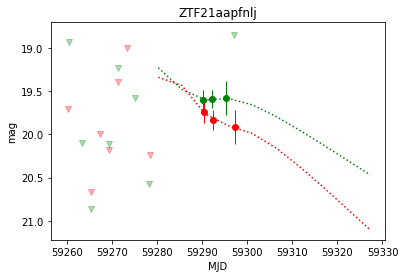

Getting forecasts for ZTF21aapfohd...


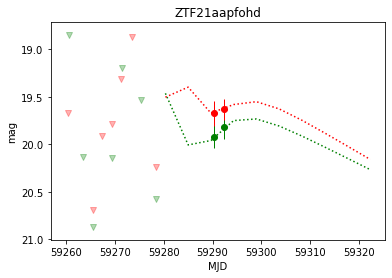

Getting forecasts for ZTF21aapforn...


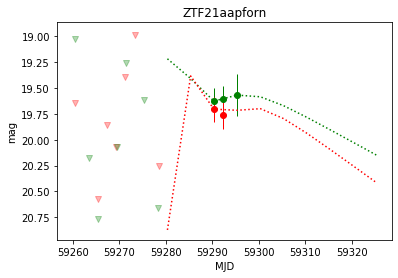

Getting forecasts for ZTF21aaphvoy...


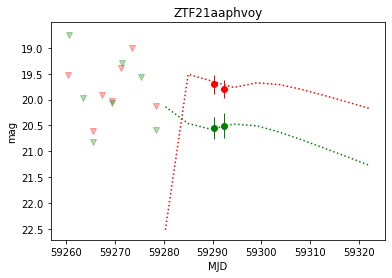

Getting forecasts for ZTF21aaphlle...


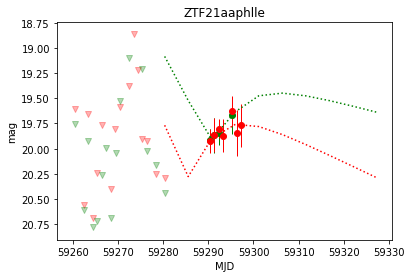

Getting forecasts for ZTF21aaphuqm...


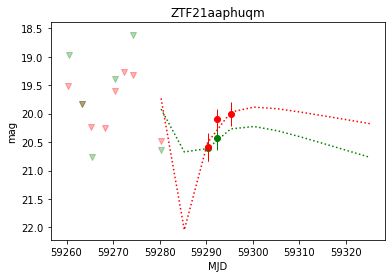

Getting forecasts for ZTF21aapfpod...


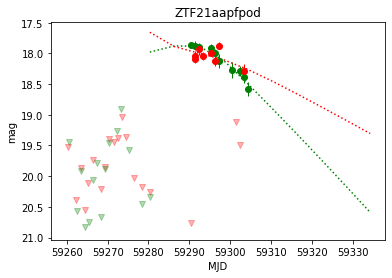

Getting forecasts for ZTF21aaphnax...


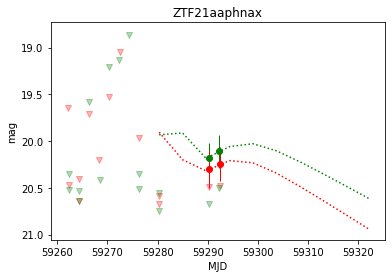

Getting forecasts for ZTF21aapfqdo...


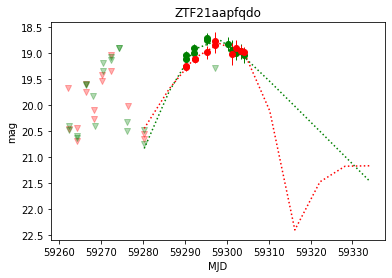

Getting forecasts for ZTF21aaphskp...


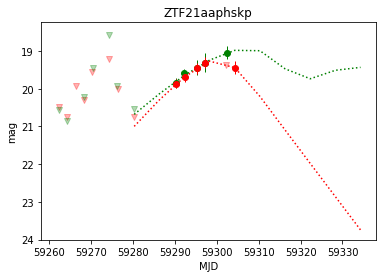

Getting forecasts for ZTF21aaphpor...


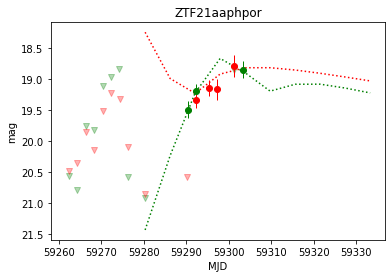

Getting forecasts for ZTF21aaphnga...


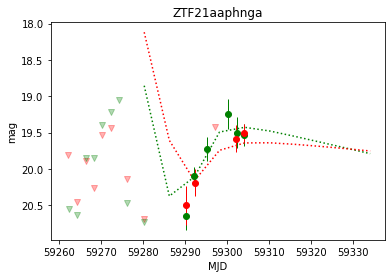

Getting forecasts for ZTF20aadayjw...


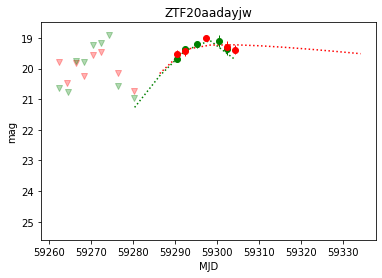

Getting forecasts for ZTF21aapfowm...


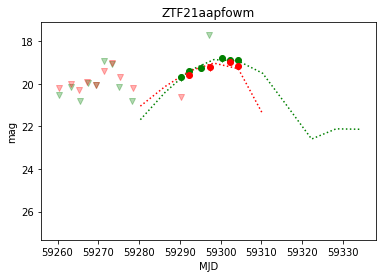

Getting forecasts for ZTF21aapfoxj...


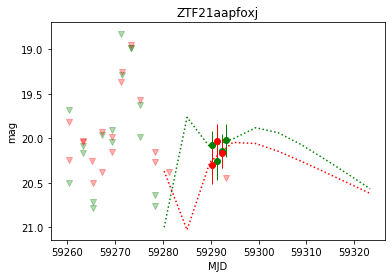

Getting forecasts for ZTF18aawpqgd...


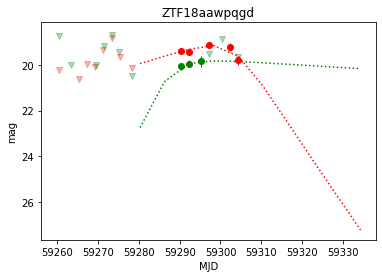

Getting forecasts for ZTF21aaphgph...


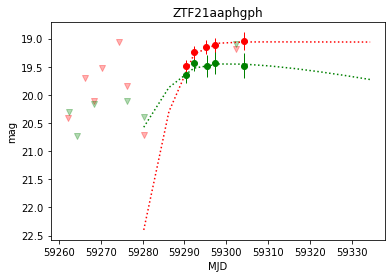

Getting forecasts for ZTF21aapfpgk...


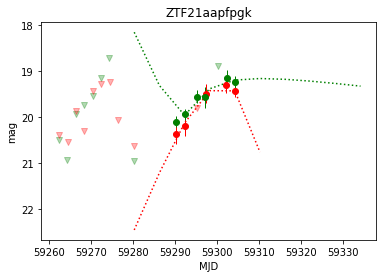

Getting forecasts for ZTF21aapejbx...


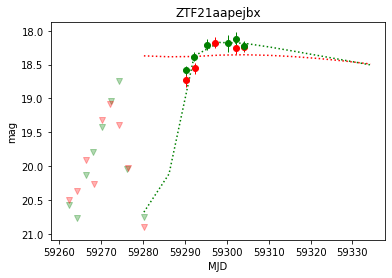

Getting forecasts for ZTF21aapfmut...


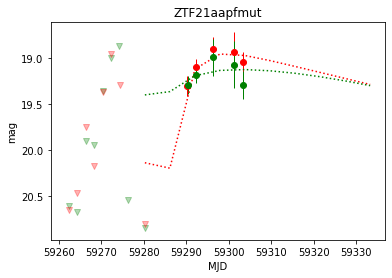

Getting forecasts for ZTF21aapfnoc...


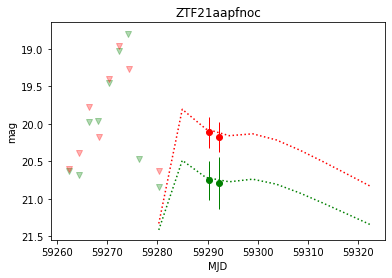

Getting forecasts for ZTF21aapffqd...


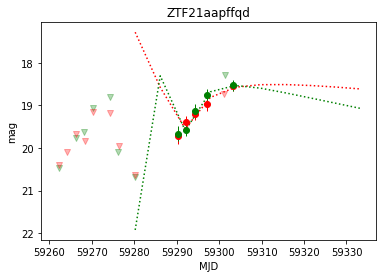

Getting forecasts for ZTF21aapfhzr...


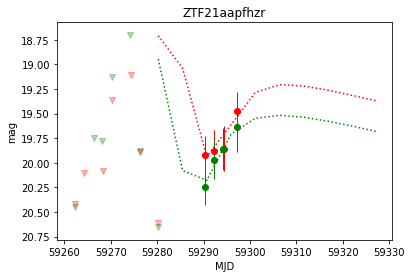

Getting forecasts for ZTF21aapehpx...


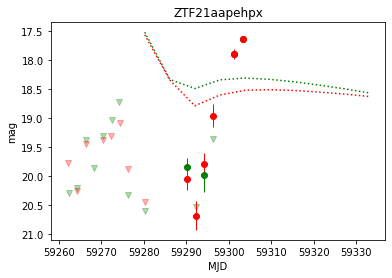

Getting forecasts for ZTF21aapecxb...


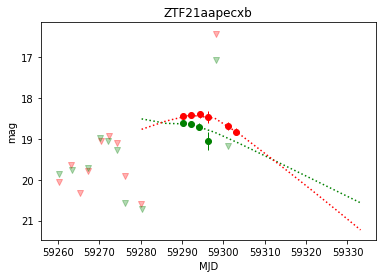

Getting forecasts for ZTF21aapdvqa...


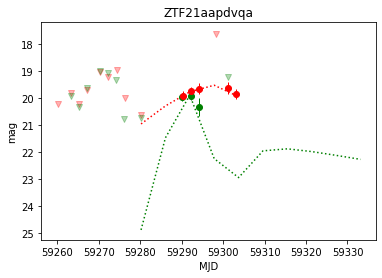

Getting forecasts for ZTF21aapdxxs...


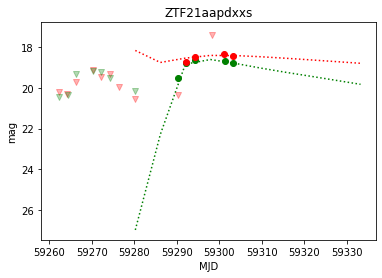

Getting forecasts for ZTF21aapduio...


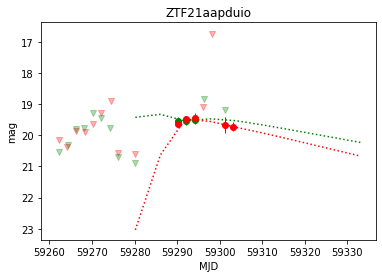

Getting forecasts for ZTF21aapdumx...


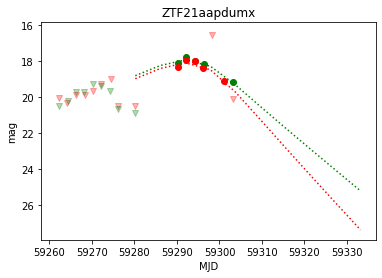

Getting forecasts for ZTF21aapdulz...


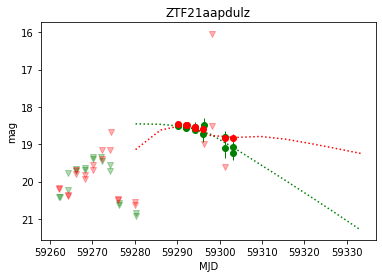

Getting forecasts for ZTF21aapduck...


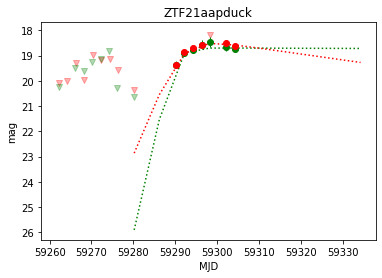

Getting forecasts for ZTF21aapduba...


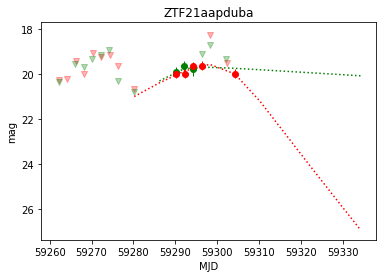

Getting forecasts for ZTF21aapdqbe...


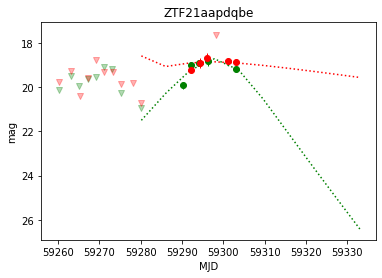

Getting forecasts for ZTF21aapdmnr...


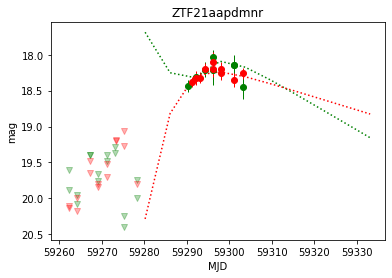

In [24]:
for oid in oids:
    if int(alerce.query_objects(oid=oid, format='pandas').ndethist.values[0]) > 6:
        show_forecast(oid)

In [25]:
oids = [
    "ZTF21aanwrsb",
    "ZTF21aanwmxn",
    "ZTF18acjxyak",
    "ZTF21aanvncv",
    "ZTF21aantsla",
    "ZTF21aantvqu",
    "ZTF21aantupk",
    "ZTF21aantrvf",
    "ZTF21aantqkt",
    "ZTF21aantose",
    "ZTF21aantowe",
    "ZTF21aantkuf",
    "ZTF21aantfmz",
    "ZTF21aanthfa",
    "ZTF21aanrvcq",
    "ZTF21aanwfjk",
    "ZTF21aanrhag",
    "ZTF21aantlex",
    "ZTF21aankmzt",
    "ZTF21aantlff",
    "ZTF21aanortq",
    "ZTF21aanuayg",
    "ZTF21aanexwi",
    "ZTF21aanehwn",
    "ZTF21aanwent"
]

Getting forecasts for ZTF21aanwrsb...


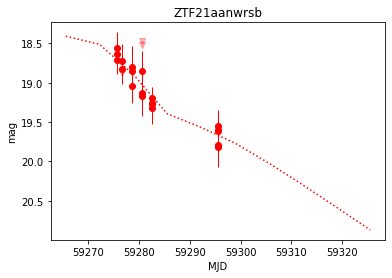

Getting forecasts for ZTF21aanwmxn...


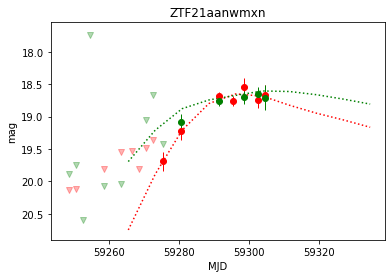

Getting forecasts for ZTF18acjxyak...


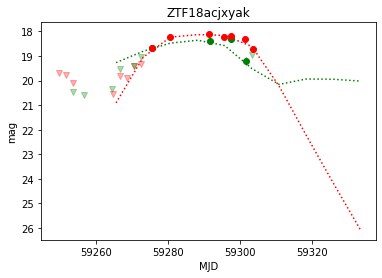

Getting forecasts for ZTF21aanvncv...


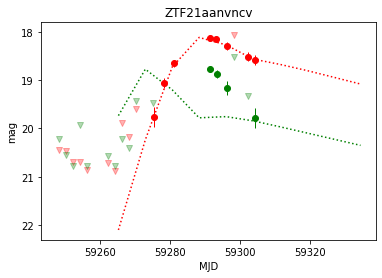

Getting forecasts for ZTF21aantsla...


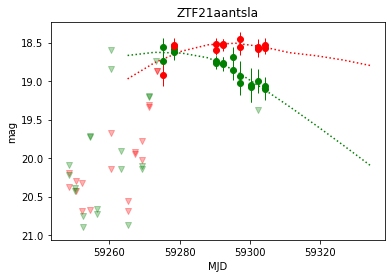

Getting forecasts for ZTF21aantvqu...


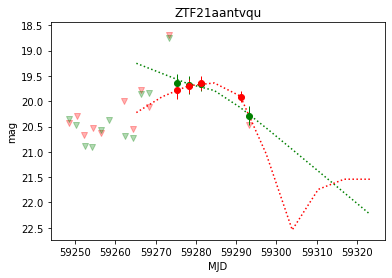

Getting forecasts for ZTF21aantupk...


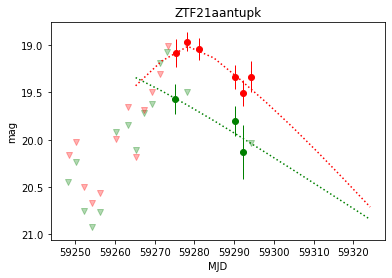

Getting forecasts for ZTF21aantrvf...


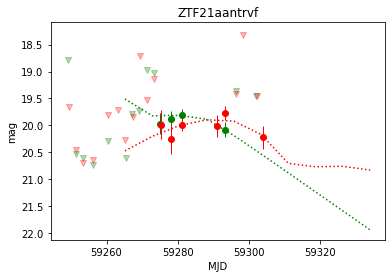

Getting forecasts for ZTF21aantqkt...


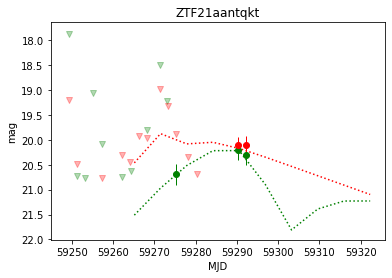

Getting forecasts for ZTF21aantose...


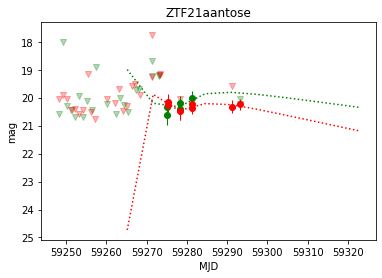

Getting forecasts for ZTF21aantkuf...


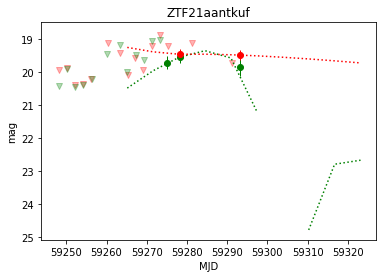

Getting forecasts for ZTF21aanthfa...


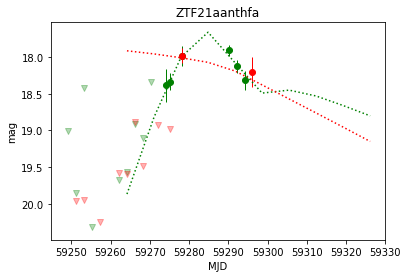

Getting forecasts for ZTF21aanrvcq...


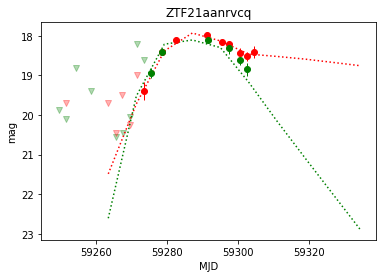

Getting forecasts for ZTF21aanwfjk...


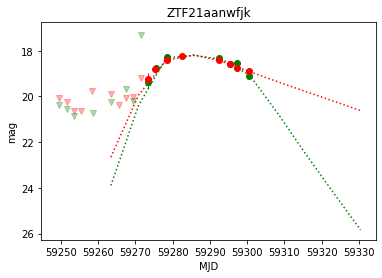

Getting forecasts for ZTF21aanrhag...


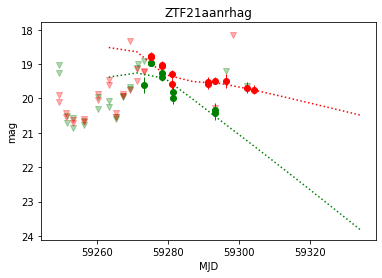

Getting forecasts for ZTF21aantlex...


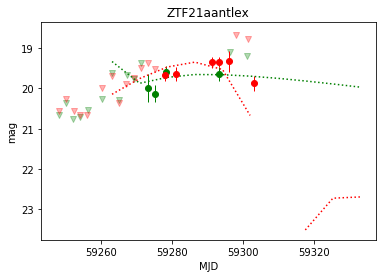

Getting forecasts for ZTF21aankmzt...


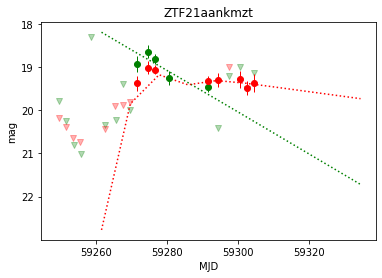

Getting forecasts for ZTF21aantlff...


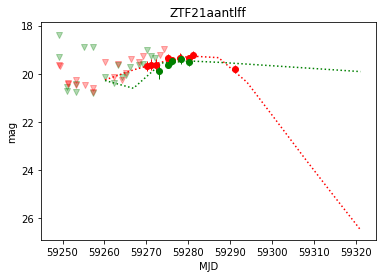

Getting forecasts for ZTF21aanortq...


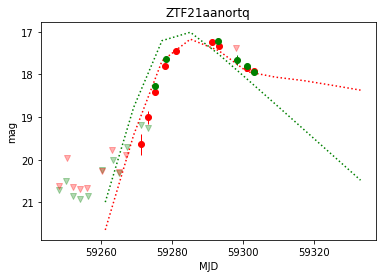

Getting forecasts for ZTF21aanuayg...


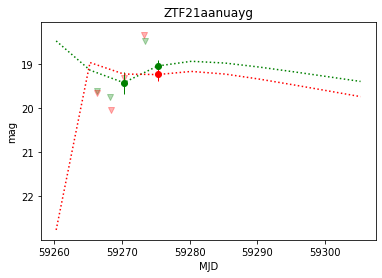

Getting forecasts for ZTF21aanexwi...


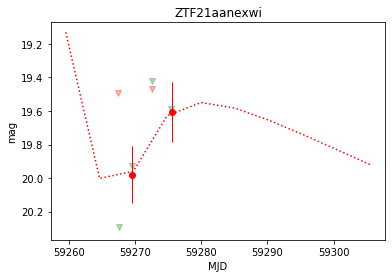

Getting forecasts for ZTF21aanehwn...


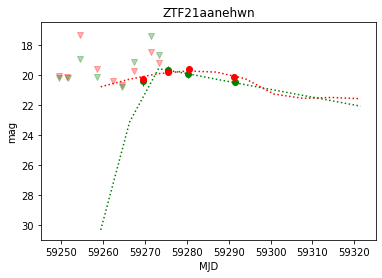

Getting forecasts for ZTF21aanwent...


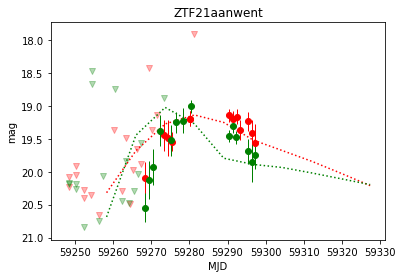

In [26]:
for oid in oids:
    if int(alerce.query_objects(oid=oid, format='pandas').ndethist.values[0]) > 6:
        show_forecast(oid)

In [27]:
oids = [
    "ZTF18aavxiih",
    "ZTF21aakvrbi",
    "ZTF21aakizlz",
    "ZTF21aakvimd",
    "ZTF21aakvuaz",
    "ZTF21aakvttl",
    "ZTF21aakiqbm",
    "ZTF21aakupyi",
    "ZTF21aakupth",
    "ZTF21aakvcxi",
    "ZTF17aabwpud",
    "ZTF21aakvrec",
    "ZTF21aakizmc",
    "ZTF21aakvhtz",
    "ZTF21aaicwbp",
    "ZTF21aaizzxf"]

Getting forecasts for ZTF18aavxiih...


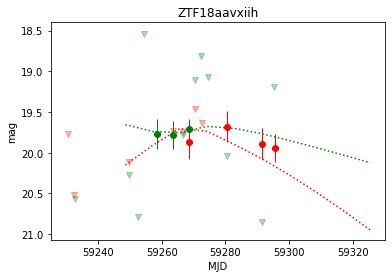

Getting forecasts for ZTF21aakvrbi...


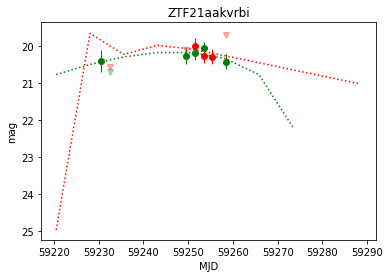

Getting forecasts for ZTF21aakizlz...


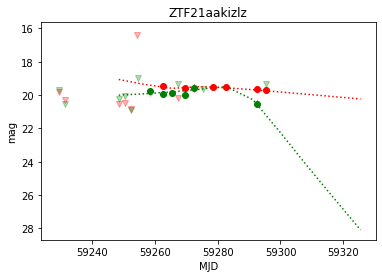

In [28]:
for oid in oids[:3]:
    if int(alerce.query_objects(oid=oid, format='pandas').ndethist.values[0]) > 6:
        show_forecast(oid)